# Bike Rental case Study

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

### Aim
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### So interpretation is important

# Step 1: Reading and understanding the data

In [ ]:
# Suppress warnings

import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd

In [59]:
day = pd.read_csv('day.csv')
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [7]:
# Checking the count for rows
day.shape

(730, 16)

In [8]:
# Checking for null values
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

# Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step -
#### understanding the data
- if there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predeictors directly have strong association with the outcome variable
We'll visualise our data using `matplotlib` and `seaborn`.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

In [60]:
# Let's plot on only the numeric variables to get a lean pairplot
day.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [18]:
day.value_counts()
num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']
cat_vars = ['dteday','season','yr','mnth','holiday','weekday','workingday','weathersit']

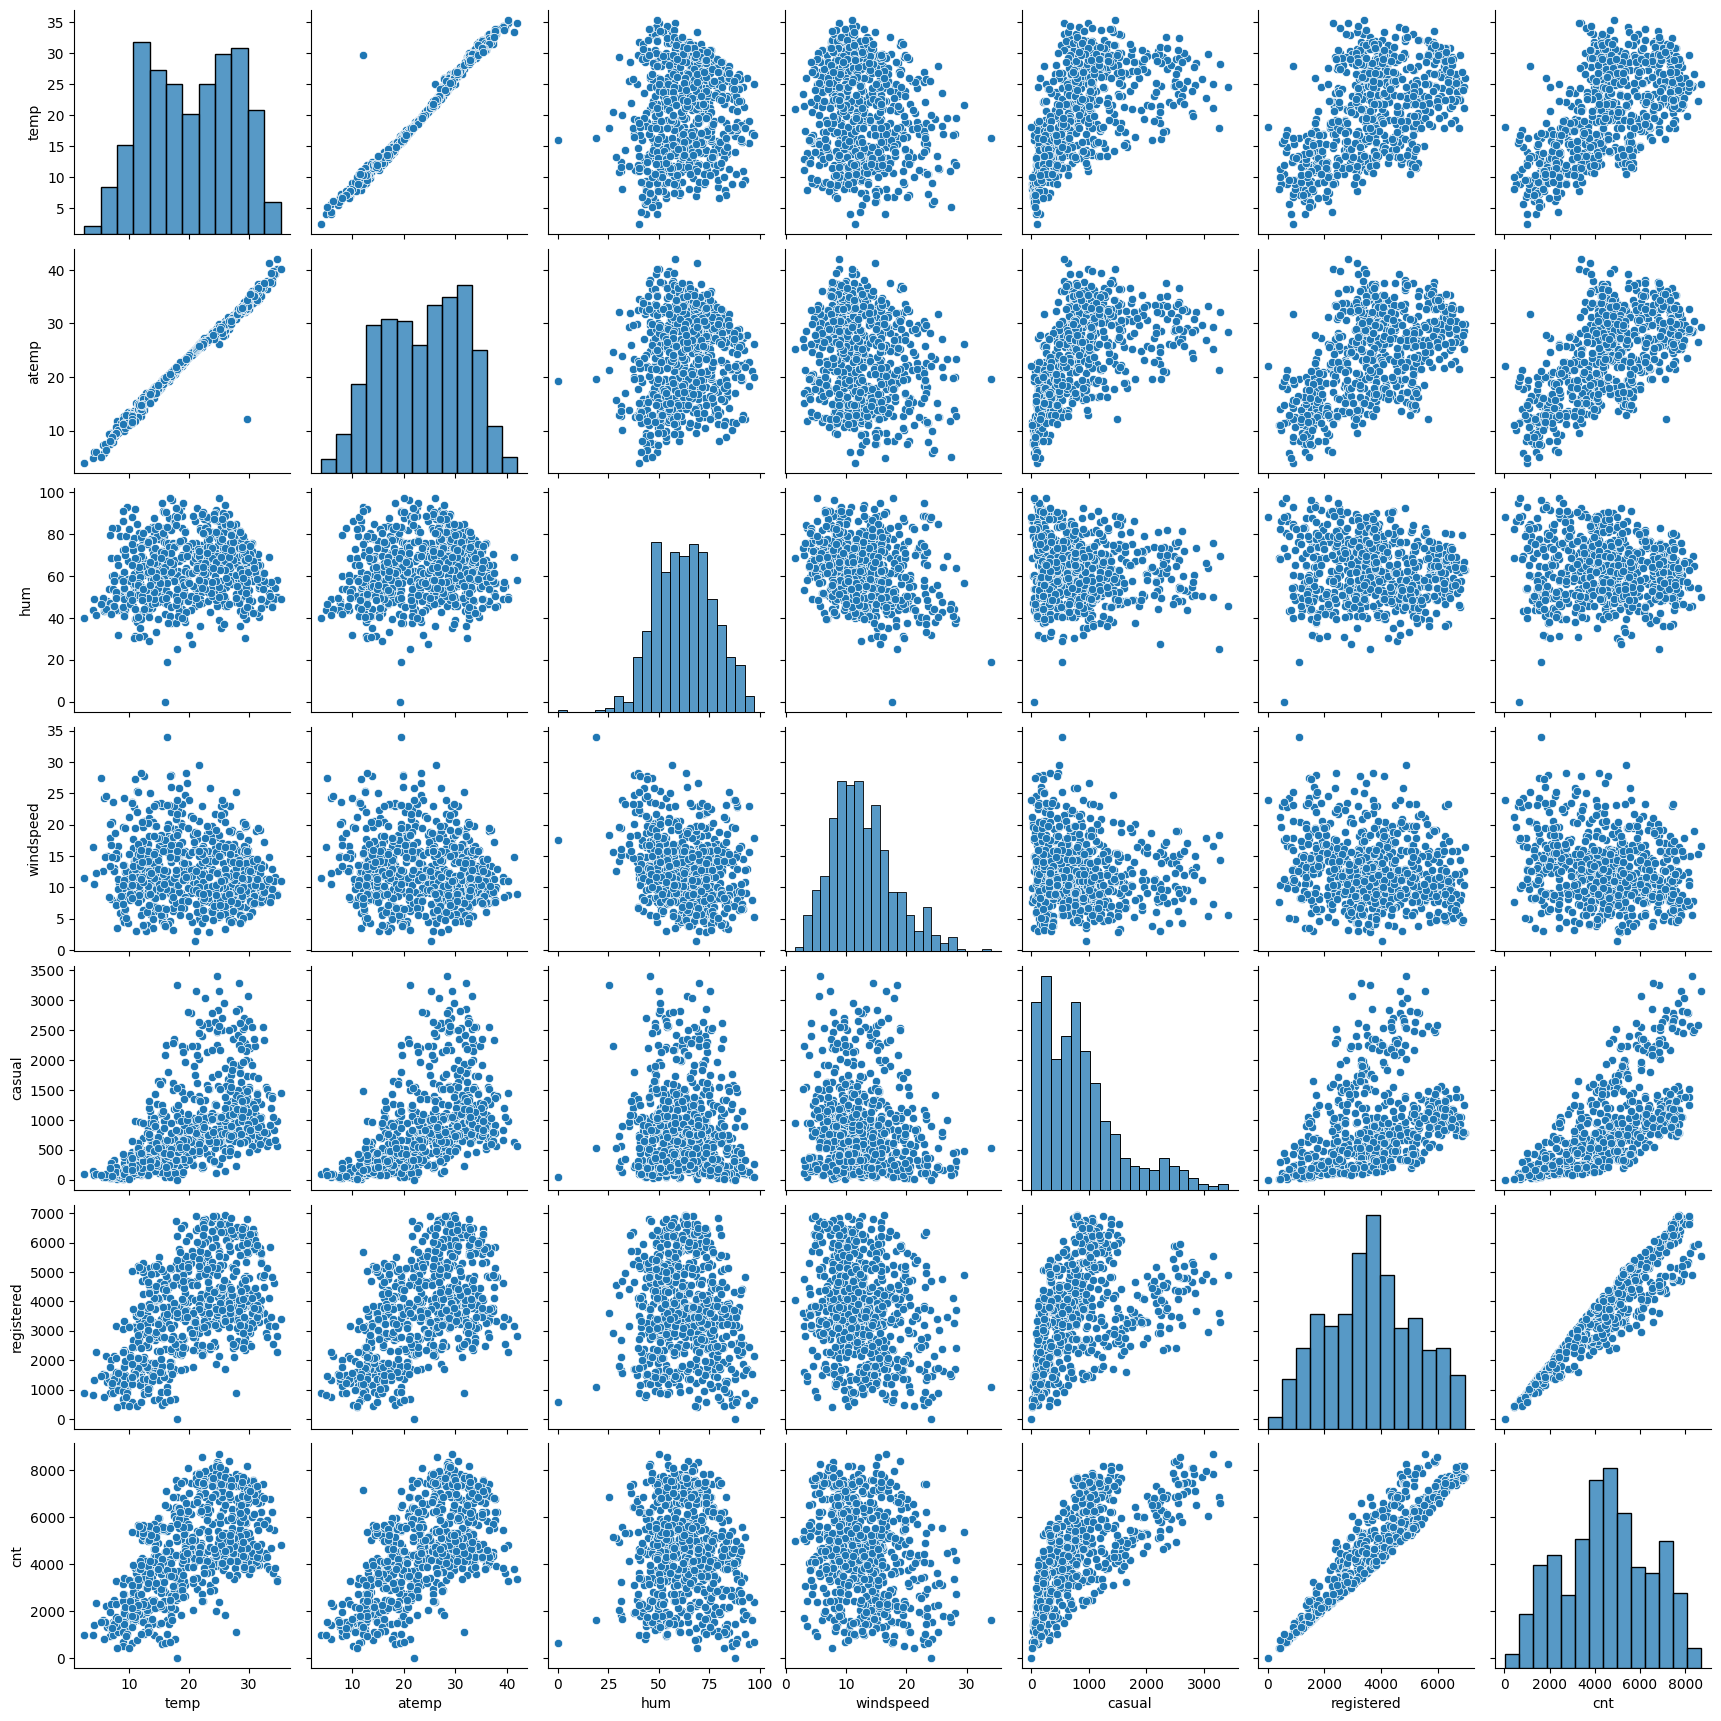

In [17]:
sns.pairplot(day[num_vars])

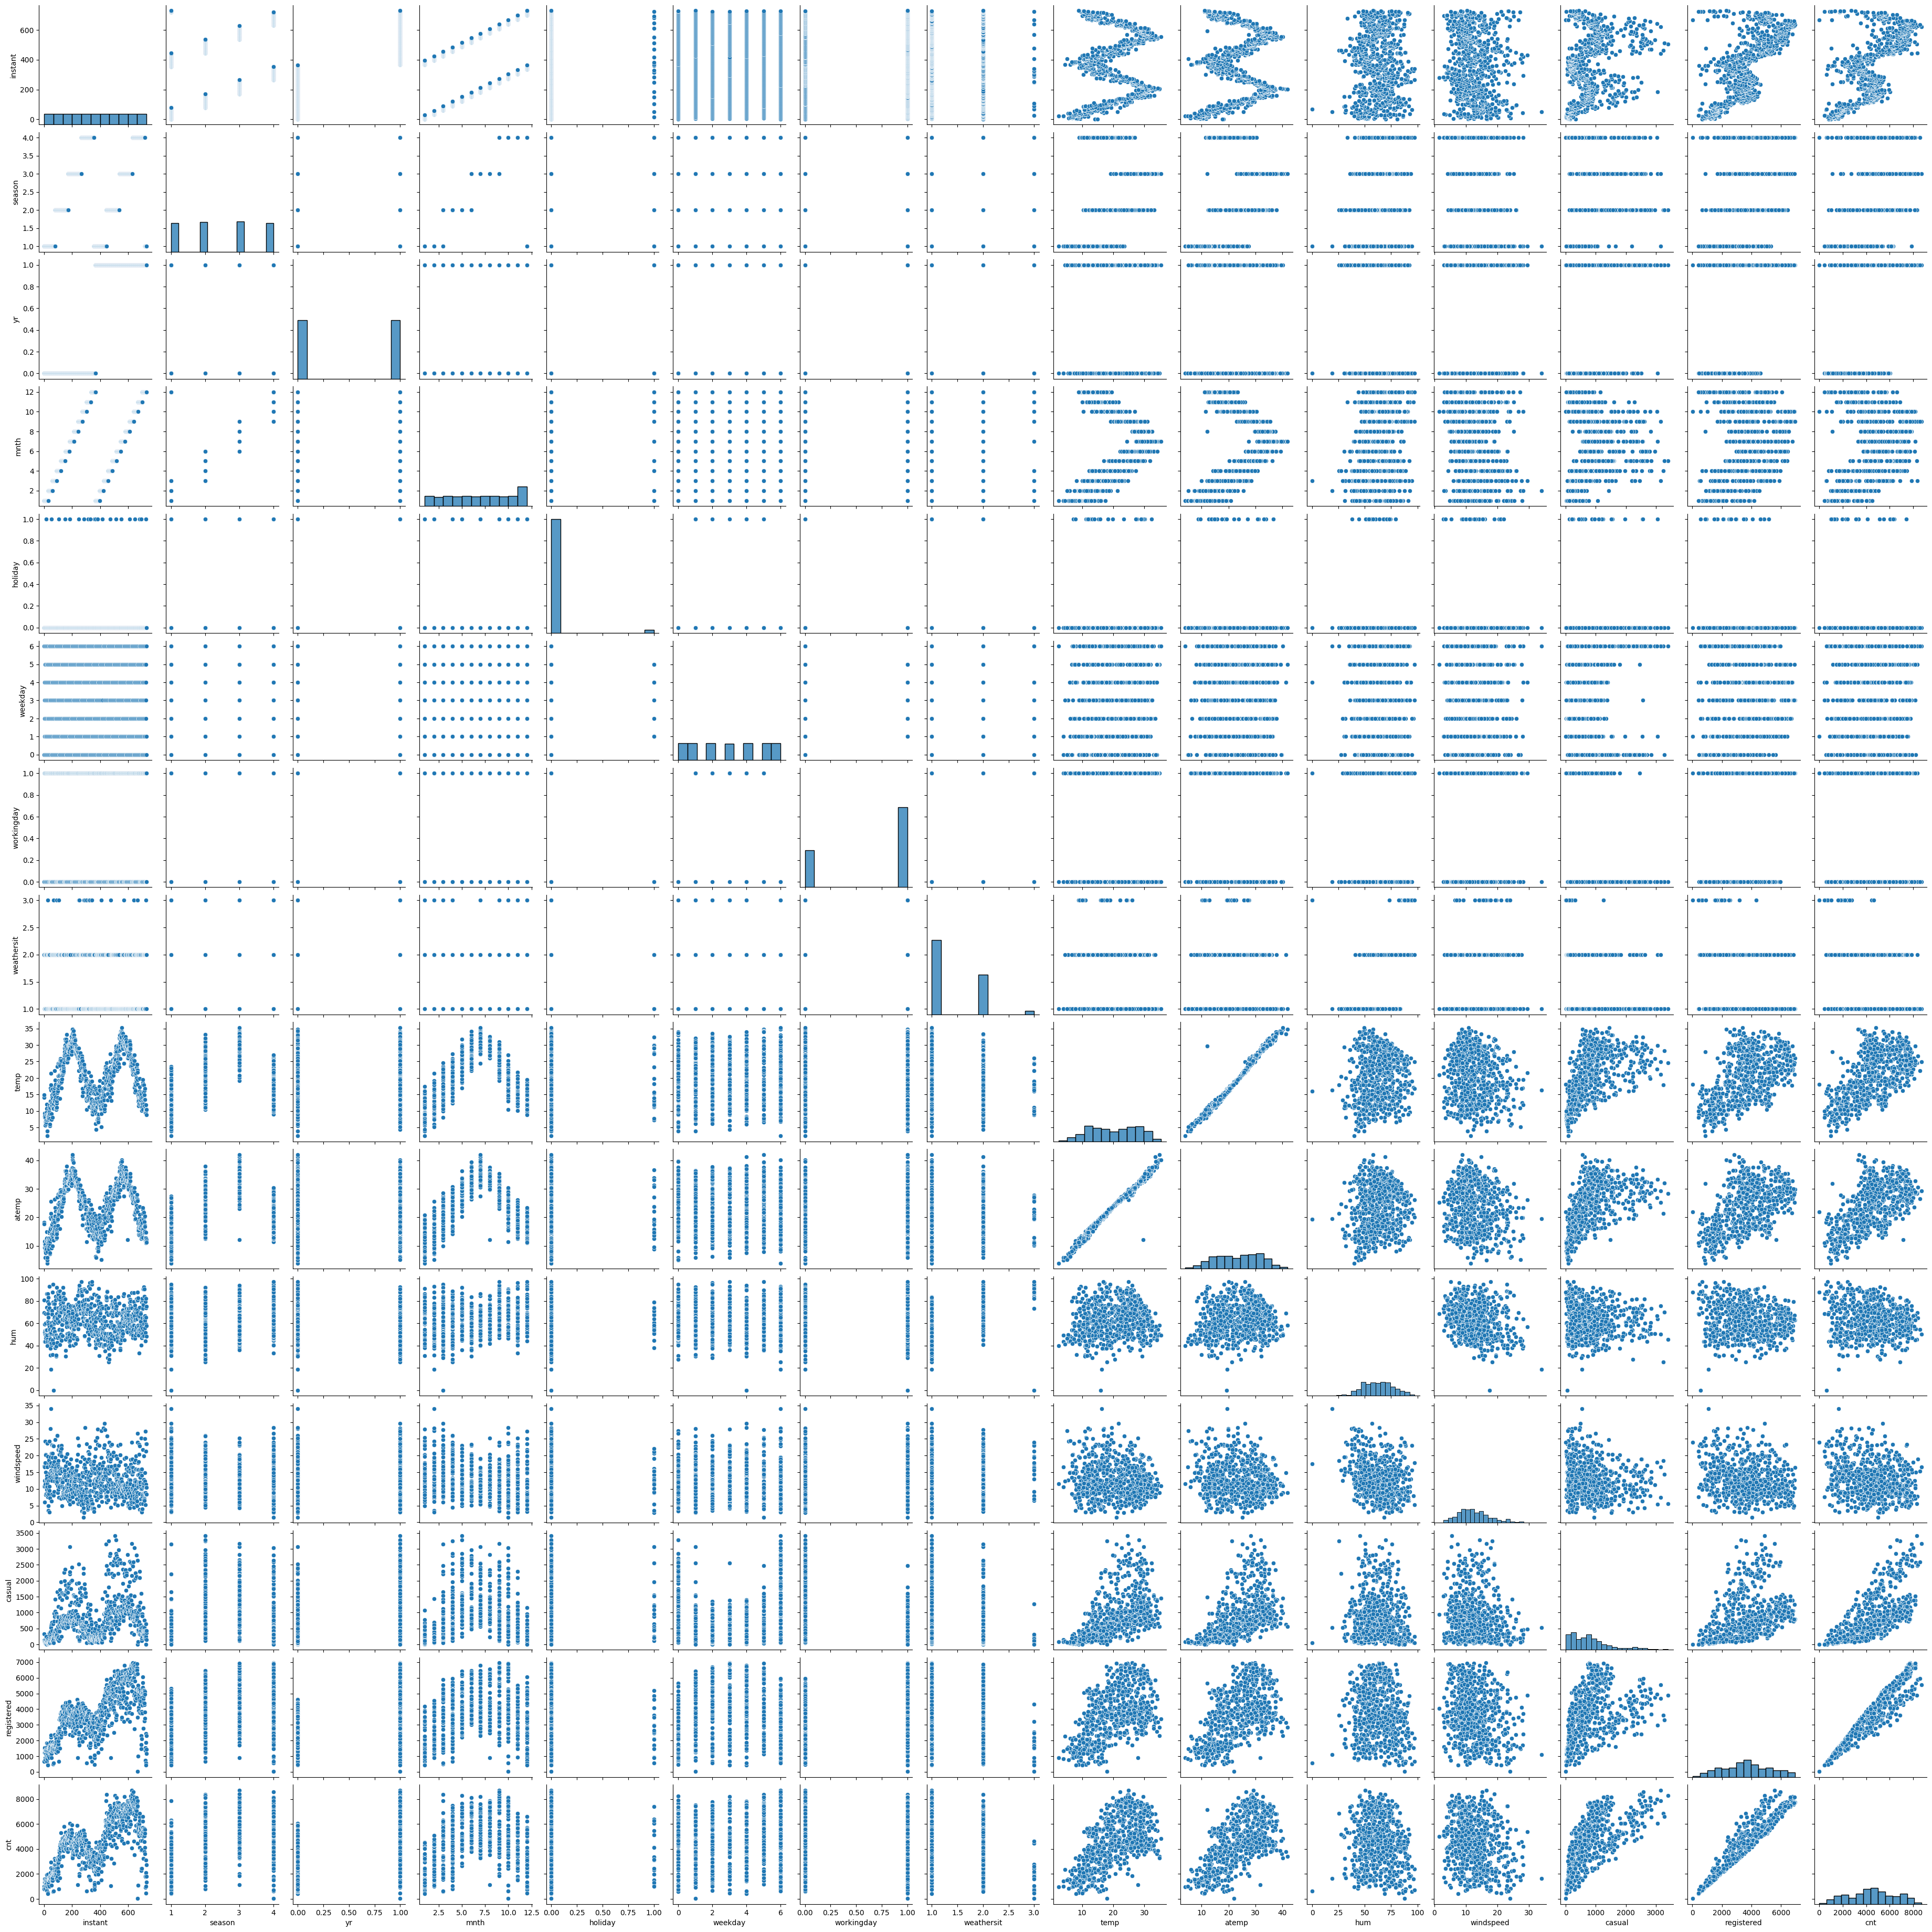

In [ ]:

sns.pairplot(day)
plt.show()

## Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [20]:
cat_vars

['dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit']

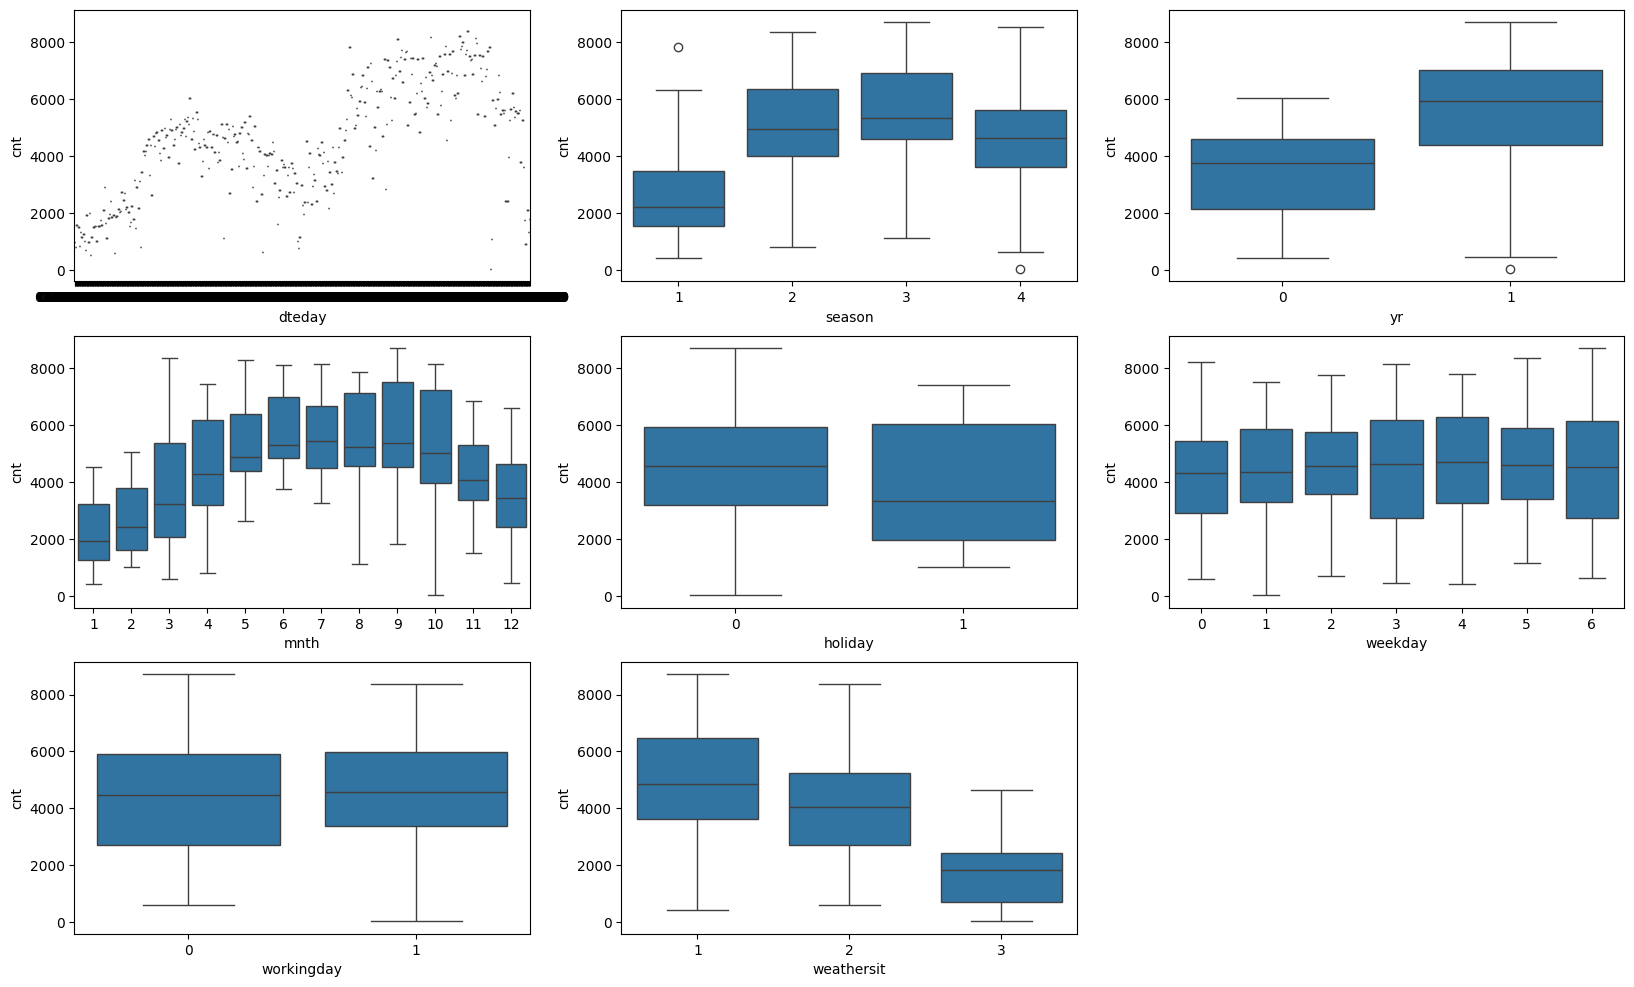

In [24]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='dteday', y='cnt', data=day)
plt.subplot(3,3,2)
sns.boxplot(x='season',y='cnt', data=day)
plt.subplot(3,3,3)
sns.boxplot(x='yr',y='cnt', data=day)
plt.subplot(3,3,4)
sns.boxplot(x='mnth', y='cnt', data=day)
plt.subplot(3,3,5)
sns.boxplot(x='holiday',y='cnt', data=day)
plt.subplot(3,3,6)
sns.boxplot(x='weekday',y='cnt', data=day)
plt.subplot(3,3,7)
sns.boxplot(x='workingday',y='cnt', data=day)
plt.subplot(3,3,8)
sns.boxplot(x='weathersit',y='cnt', data=day)
plt.show()

We can clearly see that the categorical variables like weatherist, season, mnth, yr, holiday effects the cnt

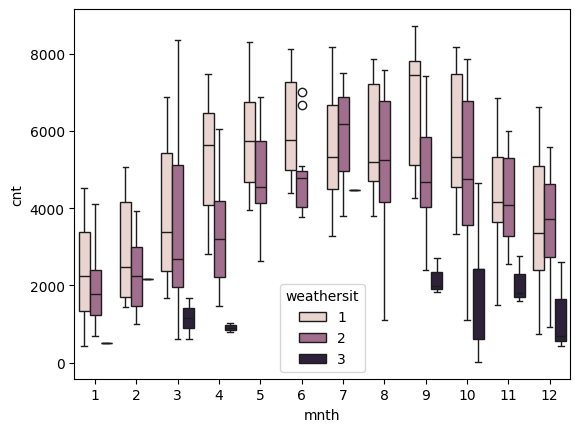

In [26]:
# Using hue on some of these variables
sns.boxplot(x='mnth',y='cnt',hue='weathersit',data=day)
plt.show()

We can see that count is varies due to the weather situation and is the highest for clear days and is the lowest for light snow, rain and stormy day

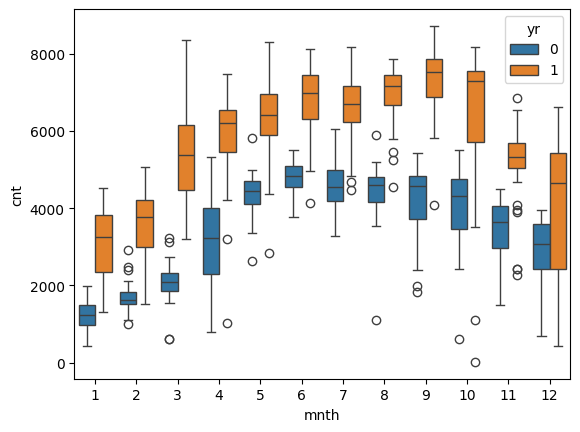

In [27]:
sns.boxplot(x='mnth',y='cnt',hue='yr',data=day)
plt.show()

We can see that the count is higher in the second year for each month

# Step 3: Data Preparation


In [61]:
day.value_counts()

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985     1
480      25-04-2019  2       1   4     0        3        1           1           19.543347  23.51585  42.7917  7.959064   655     5541        6196    1
482      27-04-2019  2       1   4     0        5        1           1           18.757500  22.63185  40.0833  23.291411  1014    5219        6233    1
483      28-04-2019  2       1   4     0        6        0           2           15.443347  18.87520  48.9583  8.708325   1120    3100        4220    1
484      29-04-2019  2       1   4     0        0        0           1           18.791653  22.50605  58.7083  7.832836   2229    4075        6304    1
                                                                                             

In [64]:
day.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

- Columns with values as 'Yes' and 'No' are already in 0 and 1 form, so no change required there.

### Dummy Variables
The variable `weathersit` has four levels, weekday has 7 levels, mnth has 12 levels, season has 4 levels, we need to convert these levels into integer.
For this, we will use `dummy variables`

In [ ]:
# Converting the numbers in Discrete variables into appropriate texts
day.weathersit = day.weathersit.apply(lambda x: 'clear' if x==1 else ('mist' if x==2 else ('light' if x==3 else 'heavy')))

In [80]:
day.weathersit.value_counts()

weathersit
clear    463
mist     246
light     21
Name: count, dtype: int64

In [ ]:
readagain = pd.read_csv('day.csv')
day.weekday = readagain.weekday
day.mnth = readagain.mnth

In [83]:
day.weekday = day.weekday.apply(lambda x: 'Sunday' if x==0 else ('Monday' if x==1 else ('Tuesday' if x==2 else ('Wednesday' if x==3 else ('Thursday' if x==4 else ('Friday' if x==5 else 'Saturday'))))))

In [84]:
day.weekday.value_counts()

weekday
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: count, dtype: int64

In [67]:
day.weekday.value_counts()

weekday
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: count, dtype: int64

In [85]:
day.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [86]:
day.mnth = day.mnth.apply(lambda x: 'Jan' if x==1 else ('Feb' if x==2 else ('Mar' if x==3 else ('Apr' if x==4 else ('May' if x==5 else ('Jun' if x==6 else ('Jul' if x==7 else ('Aug' if x==8 else ('Sep' if x==9 else ('Oct' if x==10 else ('Nov' if x==11 else 'Dec')))))))))))

In [87]:
day.mnth.value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [89]:
day.season = day.season.apply(lambda x: 'spring' if x==1 else ('summer' if x==2 else ('fall' if x==3 else 'winter')))

In [90]:
day.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

After converting all the discrete values to it's corresponding text, now we are ready to create dummy variables

In [91]:
weather_situation = pd.get_dummies(day['weathersit'],drop_first=True, dtype=int)
weekday_dummy = pd.get_dummies(day['weekday'], drop_first=True,dtype=int)
month = pd.get_dummies(day['mnth'],drop_first=True,dtype=int)
season_dummy = pd.get_dummies(day['season'],drop_first=True,dtype=int)

In [96]:

# Add the results to the original day dataframe <weather_situation, weekday_dummy, month, season_dummy>
day = pd.concat([day, weather_situation, weekday_dummy, month, season_dummy], axis=1)

In [98]:
# Checking the state of our dataframe
day.value_counts()

instant  dteday      season  yr  mnth  holiday  weekday    workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt   light  mist  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  spring  summer  winter
1        01-01-2018  spring  0   Jan   0        Saturday   0           mist        14.110847  18.18125  80.5833  10.749882  331     654         985   0      1     0       1         0       0         0        0          0    0    0    1    0    0    0    0    0    0    0    1       0       0         1
480      25-04-2019  summer  1   Apr   0        Wednesday  1           clear       19.543347  23.51585  42.7917  7.959064   655     5541        6196  0      0     0       0         0       0         0        1          0    0    0    0    0    0    0    0    0    0    0    0       1       0         1
482      27-04-2019  summer  1   Apr   0        Friday     1           clear       18.757500  22.63

In [99]:
# Drop the columns converted to dummy variables, dropping date column 'dteday' also as it's not required
day.drop(['weathersit','weekday','mnth','season','dteday'], axis=1, inplace=True)

In [100]:
day.head()

instant  yr  holiday  workingday       temp     atemp      hum  windspeed  \
0        1   0        0           0  14.110847  18.18125  80.5833  10.749882   
1        2   0        0           0  14.902598  17.68695  69.6087  16.652113   
2        3   0        0           1   8.050924   9.47025  43.7273  16.636703   
3        4   0        0           1   8.200000  10.60610  59.0435  10.739832   
4        5   0        0           1   9.305237  11.46350  43.6957  12.522300   

   casual  registered  ...  Jul  Jun  Mar  May  Nov  Oct  Sep  spring  summer  \
0     331         654  ...    0    0    0    0    0    0    0       1       0   
1     131         670  ...    0    0    0    0    0    0    0       1       0   
2     120        1229  ...    0    0    0    0    0    0    0       1       0   
3     108        1454  ...    0    0    0    0    0    0    0       1       0   
4      82        1518  ...    0    0    0    0    0    0    0       1       0   

   winter  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 33 columns]

In [101]:
day.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'light', 'mist', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'spring',
       'summer', 'winter'],
      dtype='object')

# Step 4: Splitting the Data into Training and Testing Sets
First basic step for regression is performing a train-test split.

In [102]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state=100)

## Rescaling the Features
We need to do rescaling as the variables are in different scale and their coefficients might not be correct when we try to fit.

Applying MinMax Scaling

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
scaler = MinMaxScaler()

In [ ]:
day[num_vars].head()

temp     atemp      hum  windspeed  casual  registered   cnt
0  14.110847  18.18125  80.5833  10.749882     331         654   985
1  14.902598  17.68695  69.6087  16.652113     131         670   801
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600

In [110]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [111]:
df_train.head()

instant  yr  holiday  workingday      temp     atemp       hum  \
653      654   1        0           1  0.509887  0.501133  0.575354   
576      577   1        0           1  0.815169  0.766351  0.725633   
426      427   1        0           0  0.442393  0.438975  0.640189   
728      729   1        0           0  0.245101  0.200348  0.498067   
482      483   1        0           0  0.395666  0.391735  0.504508   

     windspeed    casual  registered  ...  Jul  Jun  Mar  May  Nov  Oct  Sep  \
653   0.300794  0.280402    0.951776  ...    0    0    0    0    0    1    0   
576   0.264686  0.294422    0.899220  ...    1    0    0    0    0    0    0   
426   0.255342  0.290765    0.446145  ...    0    0    1    0    0    0    0   
728   0.663106  0.110332    0.203869  ...    0    0    0    0    0    0    0   
482   0.188475  0.340750    0.444701  ...    0    0    0    0    0    0    0   

     spring  summer  winter  
653       0       0       1  
576       0       0       0  
426       1       0       0  
728       1       0       0  
482       0       1       0  

[5 rows x 33 columns]

In [112]:
df_train.describe()

instant          yr     holiday  workingday        temp       atemp  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean   368.941176    0.507843    0.025490    0.676471    0.537262    0.512989   
std    209.868619    0.500429    0.157763    0.468282    0.225844    0.212385   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%    187.250000    0.000000    0.000000    0.000000    0.339853    0.332086   
50%    373.000000    1.000000    0.000000    1.000000    0.540519    0.526811   
75%    553.750000    1.000000    0.000000    1.000000    0.735215    0.688457   
max    729.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              hum   windspeed      casual  registered  ...         Jul  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.650369    0.320768    0.254661    0.523944  ...    0.076471   
std      0.145882    0.169797    0.206011    0.228175  ...    0.266010   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.538643    0.199179    0.094179    0.353487  ...    0.000000   
50%      0.653714    0.296763    0.212740    0.525123  ...    0.000000   
75%      0.754830    0.414447    0.327415    0.696073  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Jun         Mar         May         Nov         Oct         Sep  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.074510    0.098039    0.084314    0.086275    0.086275    0.080392   
std      0.262857    0.297660    0.278131    0.281045    0.281045    0.272166   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           spring      summer     winter  
count  510.000000  510.000000  510.00000  
mean     0.243137    0.245098    0.24902  
std      0.429398    0.430568    0.43287  
min      0.000000    0.000000    0.00000  
25%      0.000000    0.000000    0.00000  
50%      0.000000    0.000000    0.00000  
75%      0.000000    0.000000    0.00000  
max      1.000000    1.000000    1.00000  

[8 rows x 33 columns]

In [113]:
df_train.drop('instant', axis=1, inplace=True)
df_test.drop('instant', axis=1, inplace=True)

In [114]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

       casual  registered       cnt  ...  Jul  Jun  Mar  May  Nov  Oct  Sep  \
653  0.280402    0.951776  0.864243  ...    0    0    0    0    0    1    0   
576  0.294422    0.899220  0.827658  ...    1    0    0    0    0    0    0   
426  0.290765    0.446145  0.465255  ...    0    0    1    0    0    0    0   
728  0.110332    0.203869  0.204096  ...    0    0    0    0    0    0    0   
482  0.340750    0.444701  0.482973  ...    0    0    0    0    0    0    0   

     spring  summer  winter  
653       0       0       1  
576       0       0       0  
426       1       0       0  
728       1       0       0  
482       0       1       0  

[5 rows x 32 columns]

Adding all the variables to the model

In [118]:
day.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'light', 'mist', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'spring',
       'summer', 'winter'],
      dtype='object')

## Dividing into X and Y sets for the model building

In [119]:
y_train = df_train.pop('cnt')
X_train = df_train

In [121]:
# Build a linear model
import statsmodels.api as sm

# 1. Add constant
X_train_lm = sm.add_constant(X_train)

# 2. Create model
lr = sm.OLS(y_train, X_train_lm)

In [122]:
# 3. fit
lr_sm = lr.fit()

# params
lr_sm.params

const         5.465259e-16
yr            1.432353e-16
holiday      -1.476665e-16
workingday    1.528089e-16
temp          8.711823e-16
atemp         4.092843e-16
hum           7.686900e-16
windspeed    -2.345353e-16
casual        3.774735e-01
registered    7.968247e-01
light        -7.902695e-17
mist          3.386005e-17
Monday       -1.725933e-16
Saturday      2.589805e-16
Sunday        1.858277e-16
Thursday      1.481189e-16
Tuesday       1.544071e-16
Wednesday     2.250377e-16
Aug           8.996496e-17
Dec          -4.202990e-17
Feb           3.029172e-16
Jan           2.557010e-16
Jul          -2.726967e-16
Jun          -2.718924e-17
Mar           1.476977e-16
May           1.600910e-17
Nov           1.537734e-16
Oct          -3.453184e-16
Sep          -2.331012e-16
spring       -1.960981e-16
summer        1.427557e-16
winter       -6.660468e-17
dtype: float64

In [123]:
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.581e+29
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:42:31   Log-Likelihood:                 16601.
No. Observations:                 510   AIC:                        -3.314e+04
Df Residuals:                     479   BIC:                        -3.301e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.465e-16   7.62e-16      0.718      0.473    -9.5e-16    2.04e-15
yr          1.432e-16   2.91e-16      0.492      0.623   -4.29e-16    7.16e-16
holiday    -1.477e-16   4.96e-16     -0.297      0.766   -1.12e-15    8.28e-16
workingday  1.528e-16   3.18e-16      0.480      0.632   -4.73e-16    7.79e-16
temp        8.712e-16   2.96e-15      0.294      0.769   -4.95e-15    6.69e-15
atemp       4.093e-16   2.85e-15      0.144      0.886   -5.19e-15    6.01e-15
hum         7.687e-16   8.06e-16      0.954      0.341   -8.15e-16    2.35e-15
windspeed  -2.345e-16   5.71e-16     -0.411      0.681   -1.36e-15    8.87e-16
casual         0.3775    8.3e-16   4.55e+14      0.000       0.377       0.377
registered     0.7968   9.86e-16   8.08e+14      0.000       0.797       0.797
light      -7.903e-17   5.98e-16     -0.132      0.895   -1.25e-15     1.1e-15
mist        3.386e-17   2.23e-16      0.152      0.879   -4.04e-16    4.71e-16
Monday     -1.726e-16   3.19e-16     -0.542      0.588   -7.99e-16    4.53e-16
Saturday     2.59e-16   3.06e-16      0.848      0.397   -3.41e-16    8.59e-16
Sunday      1.858e-16      3e-16      0.619      0.536   -4.04e-16    7.76e-16
Thursday    1.481e-16   3.23e-16      0.458      0.647   -4.87e-16    7.84e-16
Tuesday     1.544e-16   3.24e-16      0.477      0.634   -4.82e-16     7.9e-16
Wednesday    2.25e-16   3.12e-16      0.720      0.472   -3.89e-16    8.39e-16
Aug         8.996e-17   7.01e-16      0.128      0.898   -1.29e-15    1.47e-15
Dec        -4.203e-17   6.94e-16     -0.061      0.952    -1.4e-15    1.32e-15
Feb         3.029e-16   6.79e-16      0.446      0.656   -1.03e-15    1.64e-15
Jan         2.557e-16   6.93e-16      0.369      0.712   -1.11e-15    1.62e-15
Jul        -2.727e-16   7.26e-16     -0.375      0.707    -1.7e-15    1.15e-15
Jun        -2.719e-17   5.24e-16     -0.052      0.959   -1.06e-15       1e-15
Mar         1.477e-16   5.06e-16      0.292      0.770   -8.46e-16    1.14e-15
May         1.601e-17   4.37e-16      0.037      0.971   -8.43e-16    8.75e-16
Nov         1.538e-16    7.5e-16      0.205      0.838   -1.32e-15    1.63e-15
Oct        -3.453e-16   7.39e-16     -0.467      0.641    -1.8e-15    1.11e-15
Sep        -2.331e-16   6.66e-16     -0.350      0.726   -1.54e-15    1.07e-15
spring     -1.961e-16    6.2e-16     -0.316      0.752   -1.41e-15    1.02e-15
summer      1.428e-16   5.44e-16      0.263      0.793   -9.26e-16    1.21e-15
winter      -6.66e-17    5.9e-16     -0.113      0.910   -1.23e-15    1.09e-15
==============================================================================
Omnibus:                       19.353   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.037
Skew:                           0.136   Prob(JB):                      0.00661
Ku

Looking at the p-values, there are lots of variables with really high p-value that we can drop.
Let's check VIF information to add more information


In [124]:
# Check for the VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
# Create a Dataframe that will contain the names of all the variables with their respective VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

Features    VIF
2   workingday  99.64
3         temp  68.69
4        atemp  56.24
12    Saturday  22.26
13      Sunday  20.06
28      spring  10.89
30      winter  10.00
29      summer   8.41
8   registered   7.77
25         Nov   6.82
26         Oct   6.62
17         Aug   6.57
20         Jan   5.95
21         Jul   5.73
18         Dec   5.71
27         Sep   5.04
1      holiday   4.74
7       casual   4.48
19         Feb   4.41
23         Mar   3.48
0           yr   3.26
22         Jun   2.91
24         May   2.27
5          hum   2.12
16   Wednesday   2.01
11      Monday   2.00
14    Thursday   1.86
15     Tuesday   1.84
10        mist   1.72
9        light   1.57
6    windspeed   1.44

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variables and updating the model
- High p-value High VIF, drop the column
- High-Low:
    - High p-value, low VIF, remove these first
    - Low p-value, high VIF, remove these after the ones above
- Low p-value, low VIF, don't drop

In [126]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('May', axis=1)

In [127]:
# Build new model
# Add constant
X_train_lm = sm.add_constant(X)

# Build model
lr_2 = sm.OLS(y_train,X_train_lm).fit()

# Summary
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.121e+30
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:07:52   Log-Likelihood:                 17129.
No. Observations:                 510   AIC:                        -3.420e+04
Df Residuals:                     480   BIC:                        -3.407e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.616e-16    2.7e-16      2.448      0.0

In [128]:
# Calculate VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2   workingday  99.63
3         temp  66.34
4        atemp  55.66
12    Saturday  22.26
13      Sunday  20.05
27      spring  10.85
29      winter  10.00
28      summer   8.39
8   registered   7.69
24         Nov   6.53
25         Oct   6.15
20         Jan   5.75
17         Aug   5.50
18         Dec   5.43
21         Jul   4.83
1      holiday   4.73
7       casual   4.46
26         Sep   4.30
19         Feb   4.22
0           yr   3.21
23         Mar   3.05
5          hum   2.10
22         Jun   2.07
16   Wednesday   2.01
11      Monday   2.00
14    Thursday   1.86
15     Tuesday   1.84
10        mist   1.72
9        light   1.57
6    windspeed   1.43

In [129]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.121e+30
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:10:30   Log-Likelihood:                 17129.
No. Observations:                 510   AIC:                        -3.420e+04
Df Residuals:                     480   BIC:                        -3.407e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.616e-16    2.7e-16      2.448      0.015    1.31e-16    1.19e-15
yr           1.45e-16   1.03e-16      1.414      0.158   -5.65e-17    3.47e-16
holiday    -1.435e-16   1.76e-16     -0.815      0.415    -4.9e-16    2.02e-16
workingday   8.96e-17   1.13e-16      0.794      0.428   -1.32e-16    3.11e-16
temp        3.811e-16   1.03e-15      0.369      0.712   -1.65e-15    2.41e-15
atemp      -7.128e-16   1.01e-15     -0.709      0.479   -2.69e-15    1.26e-15
hum         1.985e-16   2.85e-16      0.697      0.486   -3.61e-16    7.58e-16
windspeed  -3.719e-16   2.01e-16     -1.847      0.065   -7.68e-16    2.38e-17
casual         0.3775   2.94e-16   1.29e+15      0.000       0.377       0.377
registered     0.7968   3.48e-16   2.29e+15      0.000       0.797       0.797
light        -5.9e-16   2.12e-16     -2.779      0.006   -1.01e-15   -1.73e-16
mist        -1.42e-16    7.9e-17     -1.798      0.073   -2.97e-16    1.32e-17
Monday       3.39e-17   1.13e-16      0.300      0.764   -1.88e-16    2.56e-16
Saturday    2.356e-16   1.08e-16      2.175      0.030    2.27e-17    4.48e-16
Sunday      2.256e-16   1.06e-16      2.120      0.035    1.65e-17    4.35e-16
Thursday    1.432e-16   1.15e-16      1.248      0.213   -8.23e-17    3.69e-16
Tuesday     9.978e-17   1.15e-16      0.869      0.385   -1.26e-16    3.25e-16
Wednesday    2.69e-16   1.11e-16      2.426      0.016    5.11e-17    4.87e-16
Aug        -1.299e-16   2.28e-16     -0.571      0.569   -5.77e-16    3.18e-16
Dec         1.746e-16    2.4e-16      0.728      0.467   -2.97e-16    6.46e-16
Feb        -7.032e-17   2.36e-16     -0.299      0.765   -5.33e-16    3.92e-16
Jan        -5.194e-16   2.42e-16     -2.147      0.032   -9.95e-16    -4.4e-17
Jul        -2.036e-17   2.37e-16     -0.086      0.931   -4.85e-16    4.45e-16
Jun          5.09e-17   1.57e-16      0.324      0.746   -2.57e-16    3.59e-16
Mar         -5.88e-17   1.68e-16     -0.350      0.727   -3.89e-16    2.72e-16
Nov        -2.579e-16    2.6e-16     -0.991      0.322   -7.69e-16    2.54e-16
Oct         4.289e-17   2.53e-16      0.170      0.865   -4.54e-16     5.4e-16
Sep        -1.614e-16   2.18e-16     -0.740      0.460    -5.9e-16    2.67e-16
spring     -3.365e-16    2.2e-16     -1.532      0.126   -7.68e-16    9.52e-17
summer     -3.801e-17   1.93e-16     -0.197      0.844   -4.17e-16    3.41e-16
winter     -1.162e-17   2.09e-16     -0.056      0.956   -4.23e-16    3.99e-16
==============================================================================
Omnibus:                       15.956   Durbin-Watson:                   0.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.574
Skew:                           0.424   Prob(JB):                     0.000252
Kurtosis:                       3.249   Cond. No.                     1.57e+15
==

In [133]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['winter','May'], axis=1)

In [134]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'light', 'mist', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'Nov', 'Oct', 'Sep', 'spring', 'summer'],
      dtype='object')

In [135]:
# Build new model
# Add constant
X_train_lm = sm.add_constant(X)

# Build model
lr_3 = sm.OLS(y_train,X_train_lm).fit()

# Summary
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.434e+29
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:16:23   Log-Likelihood:                 16853.
No. Observations:                 510   AIC:                        -3.365e+04
Df Residuals:                     481   BIC:                        -3.352e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.066e-16   4.56e-16      0.453      0.651   -6.89e-16     1.1e-15
yr          1.033e-16   1.74e-16      0.592      0.554   -2.39e-16    4.46e-16
holiday     4.357e-16   3.02e-16      1.441      0.150   -1.58e-16    1.03e-15
workingday  9.627e-17   1.94e-16      0.496      0.620   -2.85e-16    4.77e-16
temp       -1.904e-15   1.77e-15     -1.076      0.283   -5.38e-15    1.57e-15
atemp       2.106e-15   1.73e-15      1.219      0.223   -1.29e-15     5.5e-15
hum         2.098e-16   4.88e-16      0.430      0.668    -7.5e-16    1.17e-15
windspeed  -2.883e-16   3.46e-16     -0.833      0.405   -9.68e-16    3.92e-16
casual         0.3775   5.04e-16   7.49e+14      0.000       0.377       0.377
registered     0.7968   5.84e-16   1.37e+15      0.000       0.797       0.797
light       6.392e-16   3.65e-16      1.754      0.080    -7.7e-17    1.36e-15
mist        1.753e-16   1.36e-16      1.292      0.197   -9.13e-17    4.42e-16
Monday        1.8e-16   1.94e-16      0.927      0.355   -2.02e-16    5.62e-16
Saturday   -1.864e-16   1.83e-16     -1.017      0.310   -5.47e-16    1.74e-16
Sunday      2.736e-17    1.8e-16      0.152      0.879   -3.26e-16     3.8e-16
Thursday    1.176e-16   1.97e-16      0.597      0.551    -2.7e-16    5.05e-16
Tuesday     1.043e-16   1.97e-16      0.529      0.597   -2.83e-16    4.92e-16
Wednesday   3.701e-16   1.91e-16      1.943      0.053   -4.25e-18    7.44e-16
Aug          3.69e-16   3.73e-16      0.989      0.323   -3.64e-16     1.1e-15
Dec         3.375e-16   3.76e-16      0.898      0.370   -4.01e-16    1.08e-15
Feb        -5.831e-17   3.96e-16     -0.147      0.883   -8.36e-16     7.2e-16
Jan        -3.848e-17   4.07e-16     -0.094      0.925   -8.39e-16    7.62e-16
Jul         1.834e-16   3.92e-16      0.468      0.640   -5.87e-16    9.53e-16
Jun         4.154e-16   2.67e-16      1.555      0.121    -1.1e-16     9.4e-16
Mar         2.207e-17   2.83e-16      0.078      0.938   -5.35e-16    5.79e-16
Nov         4.595e-16   3.92e-16      1.172      0.242   -3.11e-16    1.23e-15
Oct         4.481e-16   3.76e-16      1.192      0.234   -2.91e-16    1.19e-15
Sep         1.367e-16   3.71e-16      0.368      0.713   -5.92e-16    8.66e-16
spring       2.56e-16   3.11e-16      0.822      0.411   -3.56e-16    8.68e-16
summer      4.312e-16   3.05e-16      1.412      0.159   -1.69e-16    1.03e-15
==============================================================================
Omnibus:                        2.564   Durbin-Watson:                   0.209
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                2.729
Skew:                           0.011   Prob(JB):                        0.255
Kurtosis:                       3.358   Cond. No.                     1.56e+15
==============================================================================

N

In [132]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'light', 'mist', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'spring', 'summer', 'winter'],
      dtype='object')

In [136]:
# Calculate VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2   workingday  97.13
3         temp  65.91
4        atemp  55.59
12    Saturday  21.32
13      Sunday  19.16
27      spring   7.38
8   registered   7.32
28      summer   7.14
20         Jan   5.52
24         Nov   5.01
17         Aug   5.00
1      holiday   4.62
25         Oct   4.61
18         Dec   4.51
21         Jul   4.48
7       casual   4.45
26         Sep   4.21
19         Feb   4.03
0           yr   3.15
23         Mar   2.94
5          hum   2.10
22         Jun   2.03
16   Wednesday   2.01
11      Monday   2.00
14    Thursday   1.86
15     Tuesday   1.84
10        mist   1.72
9        light   1.57
6    windspeed   1.43

In [137]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['winter','May','Mar'], axis=1)

In [138]:
# Build new model
# Add constant
X_train_lm = sm.add_constant(X)

# Build model
lr_4 = sm.OLS(y_train,X_train_lm).fit()

# Summary
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.197e+30
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:25:21   Log-Likelihood:                 17422.
No. Observations:                 510   AIC:                        -3.479e+04
Df Residuals:                     482   BIC:                        -3.467e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.272e-17   1.36e-16      0.680      0.497   -1.75e-16    3.61e-16
yr         -8.369e-17   5.71e-17     -1.466      0.143   -1.96e-16    2.85e-17
holiday      2.29e-16   9.79e-17      2.339      0.020    3.66e-17    4.21e-16
workingday  7.536e-17   6.13e-17      1.229      0.220   -4.52e-17    1.96e-16
temp        7.646e-16   5.75e-16      1.330      0.184   -3.65e-16    1.89e-15
atemp      -1.598e-15   5.66e-16     -2.825      0.005   -2.71e-15   -4.86e-16
hum        -1.033e-16    1.6e-16     -0.647      0.518   -4.17e-16     2.1e-16
windspeed  -4.329e-16   1.13e-16     -3.822      0.000   -6.55e-16    -2.1e-16
casual         0.3775   1.65e-16   2.29e+15      0.000       0.377       0.377
registered     0.7968   1.91e-16   4.17e+15      0.000       0.797       0.797
light      -8.295e-17   1.19e-16     -0.695      0.487   -3.17e-16    1.51e-16
mist         1.67e-16   4.44e-17      3.762      0.000    7.98e-17    2.54e-16
Monday      9.186e-17   6.36e-17      1.445      0.149    -3.3e-17    2.17e-16
Saturday    5.073e-16   5.77e-17      8.785      0.000    3.94e-16    6.21e-16
Sunday      2.225e-16   5.72e-17      3.893      0.000     1.1e-16    3.35e-16
Thursday    1.462e-16   6.44e-17      2.269      0.024    1.96e-17    2.73e-16
Tuesday    -2.168e-17   6.46e-17     -0.336      0.737   -1.49e-16    1.05e-16
Wednesday   1.041e-16   6.24e-17      1.670      0.096   -1.84e-17    2.27e-16
Aug        -3.361e-17   1.16e-16     -0.289      0.773   -2.62e-16    1.95e-16
Dec        -6.885e-17   9.95e-17     -0.692      0.489   -2.64e-16    1.27e-16
Feb        -2.342e-16   9.15e-17     -2.559      0.011   -4.14e-16   -5.44e-17
Jan        -6.614e-16   9.16e-17     -7.219      0.000   -8.41e-16   -4.81e-16
Jul         1.013e-16   1.24e-16      0.818      0.414   -1.42e-16    3.45e-16
Jun         5.015e-17   8.57e-17      0.585      0.559   -1.18e-16    2.19e-16
Nov         1.218e-16   1.13e-16      1.077      0.282      -1e-16    3.44e-16
Oct        -2.146e-17    1.1e-16     -0.194      0.846   -2.39e-16    1.96e-16
Sep        -3.153e-16   1.13e-16     -2.788      0.006   -5.38e-16   -9.31e-17
spring      2.582e-16   9.85e-17      2.621      0.009    6.46e-17    4.52e-16
summer      8.096e-17   9.43e-17      0.858      0.391   -1.04e-16    2.66e-16
==============================================================================
Omnibus:                       17.789   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.177
Skew:                          -0.368   Prob(JB):                     2.52e-05
Kurtosis:                       3.675   Cond. No.                     1.57e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [139]:
# Calculate VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2   workingday  81.65
3         temp  64.97
4        atemp  55.58
12    Saturday  17.79
13      Sunday  16.10
8   registered   7.32
26      spring   6.90
27      summer   6.35
17         Aug   4.54
7       casual   4.45
21         Jul   4.18
1      holiday   4.07
23         Nov   3.89
24         Oct   3.71
25         Sep   3.65
0           yr   3.14
18         Dec   2.95
20         Jan   2.61
5          hum   2.09
19         Feb   2.01
16   Wednesday   2.00
11      Monday   2.00
22         Jun   1.96
14    Thursday   1.85
15     Tuesday   1.84
10        mist   1.72
9        light   1.57
6    windspeed   1.42

In [141]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['winter','May','Mar','Oct'], axis=1)

# Build new model
# Add constant
X_train_lm = sm.add_constant(X)

# Build model
lr_5 = sm.OLS(y_train,X_train_lm).fit()

# Summary
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.118e+30
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:27:46   Log-Likelihood:                 17198.
No. Observations:                 510   AIC:                        -3.434e+04
Df Residuals:                     483   BIC:                        -3.423e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.325e-16   1.93e-16      1.203      0.230   -1.47e-16    6.12e-16
yr         -1.546e-16   8.82e-17     -1.753      0.080   -3.28e-16    1.87e-17
holiday    -2.816e-16   1.49e-16     -1.894      0.059   -5.74e-16    1.05e-17
workingday  1.324e-16   9.33e-17      1.419      0.157   -5.09e-17    3.16e-16
temp       -2.864e-15   8.88e-16     -3.225      0.001   -4.61e-15   -1.12e-15
atemp       2.124e-15   8.75e-16      2.427      0.016    4.05e-16    3.84e-15
hum        -2.045e-16   2.45e-16     -0.836      0.403   -6.85e-16    2.76e-16
windspeed    5.99e-16   1.75e-16      3.425      0.001    2.55e-16    9.43e-16
casual         0.3775   2.55e-16   1.48e+15      0.000       0.377       0.377
registered     0.7968   2.95e-16    2.7e+15      0.000       0.797       0.797
light      -7.356e-18   1.84e-16     -0.040      0.968    -3.7e-16    3.55e-16
mist        1.499e-16   6.87e-17      2.181      0.030    1.49e-17    2.85e-16
Monday      3.445e-16   9.84e-17      3.501      0.001    1.51e-16    5.38e-16
Saturday    4.089e-16   8.75e-17      4.671      0.000    2.37e-16    5.81e-16
Sunday      6.276e-16   8.63e-17      7.275      0.000    4.58e-16    7.97e-16
Thursday    2.119e-16   9.97e-17      2.124      0.034    1.59e-17    4.08e-16
Tuesday     2.472e-16      1e-16      2.472      0.014    5.07e-17    4.44e-16
Wednesday    3.02e-16   9.65e-17      3.129      0.002    1.12e-16    4.92e-16
Aug         6.603e-16   1.36e-16      4.839      0.000    3.92e-16    9.28e-16
Dec         1.909e-16   1.19e-16      1.608      0.108   -4.23e-17    4.24e-16
Feb        -3.973e-17   1.39e-16     -0.286      0.775   -3.12e-16    2.33e-16
Jan        -1.913e-17   1.39e-16     -0.138      0.890   -2.92e-16    2.53e-16
Jul         7.054e-16   1.53e-16      4.601      0.000    4.04e-16    1.01e-15
Jun         2.574e-17   1.25e-16      0.206      0.837   -2.19e-16    2.71e-16
Nov         3.671e-16    1.2e-16      3.063      0.002    1.32e-16    6.03e-16
Sep         2.718e-16   1.23e-16      2.205      0.028    2.96e-17    5.14e-16
spring      2.826e-16    1.2e-16      2.365      0.018    4.78e-17    5.17e-16
summer      2.237e-16   9.03e-17      2.478      0.014    4.63e-17    4.01e-16
==============================================================================
Omnibus:                       24.271   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.438
Skew:                           0.546   Prob(JB):                     1.82e-06
Kurtosis:                       3.224   Cond. No.                     1.57e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.56e-28. This might indicate

In [142]:
# Calculate VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2   workingday  70.18
3         temp  64.66
4        atemp  55.49
12    Saturday  15.14
13      Sunday  13.58
8   registered   7.30
7       casual   4.43
25      spring   4.23
1      holiday   3.53
0           yr   3.13
21         Jul   2.67
17         Aug   2.60
20         Jan   2.49
26      summer   2.43
5          hum   2.05
16   Wednesday   2.00
11      Monday   2.00
19         Feb   1.93
14    Thursday   1.85
15     Tuesday   1.84
23         Nov   1.82
24         Sep   1.81
18         Dec   1.75
22         Jun   1.73
10        mist   1.71
9        light   1.56
6    windspeed   1.42

In [143]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['winter','May','Mar','Oct','Jun'], axis=1)

# Build new model
# Add constant
X_train_lm = sm.add_constant(X)

# Build model
lr_6 = sm.OLS(y_train,X_train_lm).fit()

# Summary
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.404e+30
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:29:24   Log-Likelihood:                 17440.
No. Observations:                 510   AIC:                        -3.483e+04
Df Residuals:                     484   BIC:                        -3.472e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.188e-17    1.2e-16     -0.432      0.666   -2.88e-16    1.84e-16
yr         -2.253e-16   5.48e-17     -4.113      0.000   -3.33e-16   -1.18e-16
holiday    -3.563e-16    9.2e-17     -3.871      0.000   -5.37e-16   -1.75e-16
workingday -1.114e-16   5.79e-17     -1.922      0.055   -2.25e-16    2.47e-18
temp        1.354e-15   5.26e-16      2.573      0.010     3.2e-16    2.39e-15
atemp      -1.223e-15   5.39e-16     -2.271      0.024   -2.28e-15   -1.65e-16
hum         3.593e-16   1.48e-16      2.430      0.015    6.88e-17     6.5e-16
windspeed  -9.238e-16   1.08e-16     -8.573      0.000   -1.14e-15   -7.12e-16
casual         0.3775   1.58e-16    2.4e+15      0.000       0.377       0.377
registered     0.7968   1.83e-16   4.35e+15      0.000       0.797       0.797
light       7.408e-16   1.15e-16      6.465      0.000    5.16e-16    9.66e-16
mist        8.029e-17   4.27e-17      1.882      0.060   -3.55e-18    1.64e-16
Monday      2.143e-16   6.11e-17      3.509      0.000    9.43e-17    3.34e-16
Saturday    3.455e-16   5.42e-17      6.371      0.000    2.39e-16    4.52e-16
Sunday      1.832e-16   5.35e-17      3.423      0.001    7.81e-17    2.88e-16
Thursday    1.871e-16    6.2e-17      3.020      0.003    6.54e-17    3.09e-16
Tuesday     1.323e-16   6.21e-17      2.131      0.034    1.03e-17    2.54e-16
Wednesday   6.727e-17      6e-17      1.122      0.262   -5.05e-17    1.85e-16
Aug         3.227e-16   7.51e-17      4.297      0.000    1.75e-16     4.7e-16
Dec         1.557e-16   7.36e-17      2.116      0.035    1.11e-17       3e-16
Feb         1.444e-16   8.57e-17      1.685      0.093    -2.4e-17    3.13e-16
Jan         1.118e-16   8.49e-17      1.317      0.189    -5.5e-17    2.79e-16
Jul         1.106e-16   8.36e-17      1.322      0.187   -5.37e-17    2.75e-16
Nov         5.731e-17   7.44e-17      0.770      0.442   -8.89e-17    2.04e-16
Sep         1.103e-16   7.21e-17      1.530      0.127   -3.13e-17    2.52e-16
spring      7.267e-17   7.41e-17      0.981      0.327   -7.29e-17    2.18e-16
summer      4.521e-17    5.6e-17      0.807      0.420   -6.48e-17    1.55e-16
==============================================================================
Omnibus:                        4.712   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                4.623
Skew:                          -0.182   Prob(JB):                       0.0991
Kurtosis:                       3.291   Cond. No.                     1.58e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.48e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is 

In [144]:
# Calculate VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2   workingday  70.14
3         temp  58.81
4        atemp  54.48
12    Saturday  15.13
13      Sunday  13.58
8   registered   7.28
7       casual   4.39
24      spring   4.22
1      holiday   3.52
0           yr   3.13
20         Jan   2.42
25      summer   2.42
21         Jul   2.06
17         Aug   2.04
11      Monday   2.00
16   Wednesday   2.00
5          hum   1.94
19         Feb   1.91
14    Thursday   1.85
15     Tuesday   1.84
22         Nov   1.82
18         Dec   1.75
10        mist   1.71
23         Sep   1.60
9        light   1.56
6    windspeed   1.39

In [147]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['winter','May','Mar','Oct','Jun','Nov'], axis=1)

# Build new model
# Add constant
X_train_lm = sm.add_constant(X)

# Build model
lr_7 = sm.OLS(y_train,X_train_lm).fit()

# Summary
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.570e+30
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:34:45   Log-Likelihood:                 17463.
No. Observations:                 510   AIC:                        -3.488e+04
Df Residuals:                     485   BIC:                        -3.477e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.849e-17   1.06e-16      0.834      0.404    -1.2e-16    2.97e-16
yr         -3.099e-16   5.23e-17     -5.922      0.000   -4.13e-16   -2.07e-16
holiday     2.411e-16   8.56e-17      2.816      0.005    7.29e-17    4.09e-16
workingday -2.984e-16   5.52e-17     -5.406      0.000   -4.07e-16    -1.9e-16
temp       -6.322e-16   5.01e-16     -1.262      0.208   -1.62e-15    3.52e-16
atemp       1.074e-15   5.15e-16      2.085      0.038    6.19e-17    2.09e-15
hum        -1.488e-16   1.41e-16     -1.053      0.293   -4.27e-16    1.29e-16
windspeed  -1.732e-16   1.03e-16     -1.681      0.093   -3.76e-16    2.92e-17
casual         0.3775    1.5e-16   2.52e+15      0.000       0.377       0.377
registered     0.7968   1.75e-16   4.55e+15      0.000       0.797       0.797
light       1.164e-16   1.09e-16      1.069      0.286   -9.77e-17    3.31e-16
mist        9.557e-17   4.07e-17      2.346      0.019    1.55e-17    1.76e-16
Monday      6.176e-17   5.84e-17      1.058      0.291    -5.3e-17    1.76e-16
Saturday   -2.105e-16   5.09e-17     -4.132      0.000   -3.11e-16    -1.1e-16
Sunday      2.826e-16   5.04e-17      5.603      0.000    1.83e-16    3.82e-16
Thursday     1.64e-17   5.92e-17      0.277      0.782   -9.99e-17    1.33e-16
Tuesday    -1.496e-16   5.94e-17     -2.520      0.012   -2.66e-16    -3.3e-17
Wednesday  -3.699e-17   5.73e-17     -0.645      0.519    -1.5e-16    7.56e-17
Aug         1.618e-16   7.03e-17      2.303      0.022    2.37e-17       3e-16
Dec         6.155e-17   6.35e-17      0.969      0.333   -6.33e-17    1.86e-16
Feb        -3.879e-17   8.07e-17     -0.481      0.631   -1.97e-16     1.2e-16
Jan         1.078e-16   7.92e-17      1.361      0.174   -4.78e-17    2.63e-16
Jul        -2.182e-17    7.9e-17     -0.276      0.783   -1.77e-16    1.33e-16
Sep        -9.466e-17   6.61e-17     -1.432      0.153   -2.25e-16    3.52e-17
spring     -7.244e-17   6.57e-17     -1.102      0.271   -2.02e-16    5.67e-17
summer      1.601e-16   4.79e-17      3.345      0.001     6.6e-17    2.54e-16
==============================================================================
Omnibus:                        0.033   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.043
Skew:                          -0.019   Prob(JB):                        0.979
Kurtosis:                       2.976   Cond. No.                     1.56e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.61e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [148]:
# Calculate VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2   workingday  62.72
3         temp  58.30
4        atemp  54.47
12    Saturday  13.09
13      Sunday  11.76
8   registered   7.28
7       casual   4.33
23      spring   3.63
0           yr   3.12
1      holiday   3.04
20         Jan   2.30
21         Jul   2.01
16   Wednesday   2.00
11      Monday   1.99
17         Aug   1.96
5          hum   1.94
24      summer   1.93
14    Thursday   1.85
19         Feb   1.85
15     Tuesday   1.84
10        mist   1.71
9        light   1.55
22         Sep   1.47
18         Dec   1.42
6    windspeed   1.39

In [149]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['winter','May','Mar','Oct','Jun','Nov','Jul'], axis=1)

# Build new model
# Add constant
X_train_lm = sm.add_constant(X)

# Build model
lr_8 = sm.OLS(y_train,X_train_lm).fit()

# Summary
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.193e+29
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:36:08   Log-Likelihood:                 16753.
No. Observations:                 510   AIC:                        -3.346e+04
Df Residuals:                     486   BIC:                        -3.336e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.679e-16   4.25e-16      1.335      0.182   -2.68e-16     1.4e-15
yr         -1.975e-17   2.08e-16     -0.095      0.924   -4.28e-16    3.89e-16
holiday    -1.967e-16   3.43e-16     -0.573      0.567   -8.71e-16    4.78e-16
workingday  1.835e-17    2.2e-16      0.083      0.934   -4.15e-16    4.51e-16
temp        9.241e-16   1.96e-15      0.471      0.638   -2.93e-15    4.78e-15
atemp      -3.351e-16   2.06e-15     -0.162      0.871   -4.39e-15    3.72e-15
hum        -1.423e-16   5.59e-16     -0.255      0.799   -1.24e-15    9.56e-16
windspeed   1.531e-16   4.12e-16      0.372      0.710   -6.56e-16    9.62e-16
casual         0.3775   6.01e-16   6.28e+14      0.000       0.377       0.377
registered     0.7968   6.89e-16   1.16e+15      0.000       0.797       0.797
light      -4.843e-17   4.37e-16     -0.111      0.912   -9.07e-16     8.1e-16
mist        -7.31e-17   1.64e-16     -0.447      0.655   -3.95e-16    2.48e-16
Monday     -1.073e-16   2.34e-16     -0.458      0.647   -5.68e-16    3.53e-16
Saturday    7.589e-17   2.04e-16      0.372      0.710   -3.25e-16    4.77e-16
Sunday      2.671e-16   2.02e-16      1.319      0.188   -1.31e-16    6.65e-16
Thursday    1.307e-16   2.38e-16      0.550      0.582   -3.36e-16    5.98e-16
Tuesday     5.148e-17   2.38e-16      0.216      0.829   -4.17e-16     5.2e-16
Wednesday    1.86e-16    2.3e-16      0.809      0.419   -2.66e-16    6.38e-16
Aug        -2.083e-16   2.41e-16     -0.863      0.388   -6.82e-16    2.66e-16
Dec         3.055e-16   2.55e-16      1.198      0.232   -1.96e-16    8.07e-16
Feb         1.083e-16   3.23e-16      0.335      0.738   -5.27e-16    7.43e-16
Jan         1.975e-16   3.16e-16      0.626      0.532   -4.23e-16    8.18e-16
Sep        -3.404e-17   2.47e-16     -0.138      0.890   -5.19e-16    4.51e-16
spring      3.678e-16    2.6e-16      1.417      0.157   -1.42e-16    8.78e-16
summer      3.848e-17   1.73e-16      0.222      0.824   -3.02e-16    3.79e-16
==============================================================================
Omnibus:                        3.459   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                2.968
Skew:                           0.096   Prob(JB):                        0.227
Kurtosis:                       2.680   Cond. No.                     1.56e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.6e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [150]:
# Calculate VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2   workingday  62.33
3         temp  55.47
4        atemp  54.30
12    Saturday  13.03
13      Sunday  11.73
8   registered   6.98
7       casual   4.33
22      spring   3.51
0           yr   3.05
1      holiday   3.04
20         Jan   2.27
16   Wednesday   2.00
11      Monday   1.99
5          hum   1.88
14    Thursday   1.85
15     Tuesday   1.84
19         Feb   1.84
10        mist   1.71
23      summer   1.57
9        light   1.54
17         Aug   1.43
18         Dec   1.42
6    windspeed   1.38
21         Sep   1.28

In [154]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['winter','May','Mar','Oct','Jun','Nov','Jul','Sep','Monday','Tuesday'], axis=1)

# Build new model
# Add constant
X_train_lm = sm.add_constant(X)

# Build model
lr_9 = sm.OLS(y_train,X_train_lm).fit()

# Summary
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.571e+29
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:40:51   Log-Likelihood:                 16767.
No. Observations:                 510   AIC:                        -3.349e+04
Df Residuals:                     489   BIC:                        -3.340e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.72e-16   4.06e-16      1.162      0.246   -3.26e-16    1.27e-15
yr          1.238e-16   1.99e-16      0.621      0.535   -2.68e-16    5.15e-16
holiday    -9.018e-17   3.07e-16     -0.294      0.769   -6.93e-16    5.12e-16
workingday  6.219e-17   2.05e-16      0.304      0.761    -3.4e-16    4.64e-16
temp       -6.618e-16   1.89e-15     -0.350      0.726   -4.38e-15    3.05e-15
atemp       1.206e-15   1.99e-15      0.607      0.544    -2.7e-15    5.11e-15
hum          1.61e-16    5.4e-16      0.298      0.766   -8.99e-16    1.22e-15
windspeed  -1.846e-16   3.99e-16     -0.462      0.644   -9.69e-16       6e-16
casual         0.3775   5.75e-16   6.57e+14      0.000       0.377       0.377
registered     0.7968   6.61e-16   1.21e+15      0.000       0.797       0.797
light      -3.971e-17   4.23e-16     -0.094      0.925   -8.71e-16    7.91e-16
mist        5.507e-17   1.57e-16      0.350      0.727   -2.54e-16    3.64e-16
Saturday   -2.679e-16   1.89e-16     -1.417      0.157   -6.39e-16    1.04e-16
Sunday      2.231e-16   1.86e-16      1.199      0.231   -1.43e-16    5.89e-16
Thursday    2.551e-17   1.84e-16      0.139      0.890   -3.35e-16    3.86e-16
Wednesday   2.821e-16   1.74e-16      1.617      0.106   -6.06e-17    6.25e-16
Aug         2.737e-17   2.25e-16      0.122      0.903   -4.15e-16     4.7e-16
Dec         1.721e-16   2.46e-16      0.701      0.484    -3.1e-16    6.55e-16
Feb         3.657e-16   3.13e-16      1.167      0.244    -2.5e-16    9.82e-16
Jan         3.855e-16   3.06e-16      1.260      0.208   -2.16e-16    9.87e-16
spring     -3.829e-17   2.51e-16     -0.152      0.879   -5.32e-16    4.56e-16
summer      1.952e-17   1.61e-16      0.121      0.904   -2.97e-16    3.36e-16
==============================================================================
Omnibus:                        7.612   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.621
Skew:                           0.299   Prob(JB):                       0.0221
Kurtosis:                       3.042   Cond. No.                     1.55e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.6e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [155]:
# Calculate VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2   workingday  58.88
3         temp  54.72
4        atemp  53.57
11    Saturday  12.91
12      Sunday  11.60
8   registered   6.82
7       casual   4.21
19      spring   3.50
0           yr   2.98
1      holiday   2.76
18         Jan   2.26
5          hum   1.86
17         Feb   1.84
10        mist   1.68
9        light   1.54
20      summer   1.45
16         Dec   1.40
6    windspeed   1.38
15         Aug   1.33
14   Wednesday   1.22
13    Thursday   1.17

In [156]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['winter','May','Mar','Oct','Jun','Nov','Jul','Sep','Monday','Tuesday','Thursday','Aug'], axis=1)

# Build new model
# Add constant
X_train_lm = sm.add_constant(X)

# Build model
lr_10 = sm.OLS(y_train,X_train_lm).fit()

# Summary
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.140e+29
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:42:49   Log-Likelihood:                 16758.
No. Observations:                 510   AIC:                        -3.348e+04
Df Residuals:                     491   BIC:                        -3.340e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.957e-16   4.12e-16      0.960      0.338   -4.14e-16    1.21e-15
yr         -3.252e-17   2.02e-16     -0.161      0.872    -4.3e-16    3.64e-16
holiday    -3.319e-17   3.11e-16     -0.107      0.915   -6.44e-16    5.77e-16
workingday  5.537e-16   2.06e-16      2.682      0.008    1.48e-16    9.59e-16
temp        1.288e-15   1.87e-15      0.688      0.492   -2.39e-15    4.97e-15
atemp      -1.263e-15      2e-15     -0.633      0.527   -5.18e-15    2.66e-15
hum         2.823e-18   5.48e-16      0.005      0.996   -1.07e-15    1.08e-15
windspeed   2.187e-16   4.06e-16      0.539      0.590   -5.78e-16    1.02e-15
casual         0.3775   5.83e-16   6.47e+14      0.000       0.377       0.377
registered     0.7968   6.69e-16   1.19e+15      0.000       0.797       0.797
light       1.326e-17   4.28e-16      0.031      0.975   -8.28e-16    8.55e-16
mist        3.441e-16    1.6e-16      2.152      0.032       3e-17    6.58e-16
Saturday   -3.377e-16   1.92e-16     -1.761      0.079   -7.14e-16    3.91e-17
Sunday     -1.969e-16   1.89e-16     -1.042      0.298   -5.68e-16    1.74e-16
Wednesday   3.702e-16   1.71e-16      2.171      0.030    3.52e-17    7.05e-16
Dec          2.03e-16    2.5e-16      0.813      0.416   -2.87e-16    6.94e-16
Feb         1.414e-16   3.18e-16      0.445      0.657   -4.83e-16    7.66e-16
Jan            -2e-16   3.11e-16     -0.644      0.520    -8.1e-16     4.1e-16
spring     -1.516e-16   2.54e-16     -0.596      0.552   -6.51e-16    3.48e-16
summer       2.25e-16   1.59e-16      1.414      0.158   -8.77e-17    5.38e-16
==============================================================================
Omnibus:                      120.597   Durbin-Watson:                   0.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.006
Skew:                           0.441   Prob(JB):                     5.59e-09
Kurtosis:                       1.995   Cond. No.                     1.54e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.7e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [157]:
# Calculate VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2   workingday  58.51
4        atemp  52.15
3         temp  51.90
11    Saturday  12.91
12      Sunday  11.60
8   registered   6.77
7       casual   4.19
17      spring   3.47
0           yr   2.97
1      holiday   2.74
16         Jan   2.26
5          hum   1.86
15         Feb   1.83
10        mist   1.68
9        light   1.52
14         Dec   1.40
6    windspeed   1.38
18      summer   1.36
13   Wednesday   1.13

In [158]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['winter','May','Mar','Oct','Jun','Nov','Jul','Sep','Monday','Tuesday','Thursday','Aug','light'], axis=1)

# Build new model
# Add constant
X_train_lm = sm.add_constant(X)

# Build model
lr_11 = sm.OLS(y_train,X_train_lm).fit()

# Summary
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.959e+29
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:43:49   Log-Likelihood:                 16794.
No. Observations:                 510   AIC:                        -3.355e+04
Df Residuals:                     492   BIC:                        -3.348e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.907e-16   3.83e-16      0.758      0.449   -4.63e-16    1.04e-15
yr         -4.689e-17   1.78e-16     -0.263      0.792   -3.97e-16    3.03e-16
holiday    -1.084e-16   2.88e-16     -0.376      0.707   -6.75e-16    4.58e-16
workingday  3.461e-17    1.9e-16      0.182      0.856   -3.39e-16    4.08e-16
temp        2.661e-16   1.74e-15      0.153      0.878   -3.15e-15    3.68e-15
atemp       5.928e-16   1.85e-15      0.320      0.749   -3.05e-15    4.24e-15
hum         4.087e-16    4.8e-16      0.851      0.395   -5.35e-16    1.35e-15
windspeed   2.844e-16   3.77e-16      0.754      0.451   -4.56e-16    1.02e-15
casual         0.3775   5.42e-16   6.97e+14      0.000       0.377       0.377
registered     0.7968   5.79e-16   1.38e+15      0.000       0.797       0.797
mist       -1.584e-16   1.36e-16     -1.162      0.246   -4.26e-16     1.1e-16
Saturday    8.117e-17   1.78e-16      0.457      0.648   -2.68e-16     4.3e-16
Sunday      9.395e-17   1.75e-16      0.536      0.592   -2.51e-16    4.39e-16
Wednesday  -1.917e-16   1.58e-16     -1.214      0.225   -5.02e-16    1.19e-16
Dec         1.848e-16   2.31e-16      0.800      0.424   -2.69e-16    6.39e-16
Feb         3.153e-16   2.96e-16      1.067      0.287   -2.65e-16    8.96e-16
Jan        -5.331e-17   2.87e-16     -0.186      0.853   -6.17e-16    5.11e-16
spring     -2.068e-16   2.32e-16     -0.891      0.374   -6.63e-16    2.49e-16
summer      2.248e-16   1.47e-16      1.529      0.127   -6.41e-17    5.14e-16
==============================================================================
Omnibus:                       43.388   Durbin-Watson:                   0.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.557
Skew:                           0.781   Prob(JB):                     3.87e-12
Kurtosis:                       3.186   Cond. No.                     1.55e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.56e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [159]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['winter','May','Mar','Oct','Jun','Nov','Jul','Sep','Monday','Tuesday','Thursday','Aug','light','Jan'], axis=1)

# Build new model
# Add constant
X_train_lm = sm.add_constant(X)

# Build model
lr_11 = sm.OLS(y_train,X_train_lm).fit()

# Summary
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.535e+30
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:44:30   Log-Likelihood:                 17101.
No. Observations:                 510   AIC:                        -3.417e+04
Df Residuals:                     493   BIC:                        -3.410e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.842e-16   2.04e-16      2.378      0.018    8.41e-17    8.84e-16
yr         -2.233e-16    9.7e-17     -2.304      0.022   -4.14e-16   -3.29e-17
holiday     6.979e-17   1.57e-16      0.444      0.657   -2.39e-16    3.79e-16
workingday -4.066e-17   1.04e-16     -0.392      0.695   -2.44e-16    1.63e-16
temp        9.459e-16   9.51e-16      0.994      0.321   -9.23e-16    2.82e-15
atemp      -1.758e-15   1.01e-15     -1.736      0.083   -3.75e-15    2.32e-16
hum        -3.178e-16   2.63e-16     -1.210      0.227   -8.34e-16    1.98e-16
windspeed   1.109e-16   2.03e-16      0.548      0.584   -2.87e-16    5.09e-16
casual         0.3775   2.94e-16   1.28e+15      0.000       0.377       0.377
registered     0.7968   3.16e-16   2.52e+15      0.000       0.797       0.797
mist        2.361e-17   7.46e-17      0.316      0.752   -1.23e-16     1.7e-16
Saturday    2.787e-16    9.6e-17      2.904      0.004    9.01e-17    4.67e-16
Sunday       1.64e-16    9.5e-17      1.727      0.085   -2.26e-17    3.51e-16
Wednesday   2.011e-16   8.64e-17      2.328      0.020    3.13e-17    3.71e-16
Dec         1.972e-16   1.19e-16      1.657      0.098   -3.67e-17    4.31e-16
Feb        -3.587e-16   1.38e-16     -2.605      0.009   -6.29e-16   -8.82e-17
spring     -2.839e-16   1.13e-16     -2.510      0.012   -5.06e-16   -6.17e-17
summer     -3.745e-18   8.04e-17     -0.047      0.963   -1.62e-16    1.54e-16
==============================================================================
Omnibus:                       10.156   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.361
Skew:                          -0.102   Prob(JB):                       0.0416
Kurtosis:                       2.492   Cond. No.                     1.53e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.75e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [160]:
# Calculate VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2   workingday  55.57
4        atemp  51.89
3         temp  51.77
10    Saturday  12.12
11      Sunday  10.94
8   registered   5.84
7       casual   4.12
15      spring   2.65
0           yr   2.64
1      holiday   2.63
5          hum   1.65
9         mist   1.41
16      summer   1.34
6    windspeed   1.33
14         Feb   1.33
13         Dec   1.23
12   Wednesday   1.12

In [161]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['winter','May','Mar','Oct','Jun','Nov','Jul','Sep','Monday','Tuesday','Thursday','Aug','light','Jan','summer'], axis=1)

# Build new model
# Add constant
X_train_lm = sm.add_constant(X)

# Build model
lr_12 = sm.OLS(y_train,X_train_lm).fit()

# Summary
lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.580e+30
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:18:04   Log-Likelihood:                 17004.
No. Observations:                 510   AIC:                        -3.398e+04
Df Residuals:                     494   BIC:                        -3.391e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.283e-16   2.43e-16      0.940      0.347   -2.49e-16    7.05e-16
yr         -3.031e-16   1.17e-16     -2.599      0.010   -5.32e-16   -7.39e-17
holiday      2.94e-16    1.9e-16      1.547      0.122   -7.94e-17    6.67e-16
workingday -3.157e-16    1.2e-16     -2.630      0.009   -5.52e-16   -7.98e-17
temp        6.596e-16   1.14e-15      0.580      0.562   -1.57e-15    2.89e-15
atemp      -1.973e-16   1.22e-15     -0.162      0.871   -2.59e-15    2.19e-15
hum         -4.51e-16   3.17e-16     -1.423      0.155   -1.07e-15    1.72e-16
windspeed  -1.938e-16   2.42e-16     -0.802      0.423   -6.69e-16    2.81e-16
casual         0.3775   3.43e-16    1.1e+15      0.000       0.377       0.377
registered     0.7968   3.75e-16   2.13e+15      0.000       0.797       0.797
mist        6.668e-18      9e-17      0.074      0.941    -1.7e-16    1.84e-16
Saturday    5.486e-17   1.16e-16      0.473      0.637   -1.73e-16    2.83e-16
Sunday     -8.351e-17   1.15e-16     -0.727      0.467   -3.09e-16    1.42e-16
Wednesday   2.546e-16   1.04e-16      2.442      0.015    4.98e-17    4.59e-16
Dec        -1.639e-18   1.43e-16     -0.012      0.991   -2.82e-16    2.78e-16
Feb          1.79e-16   1.66e-16      1.075      0.283   -1.48e-16    5.06e-16
spring      1.842e-16   1.28e-16      1.434      0.152   -6.82e-17    4.37e-16
==============================================================================
Omnibus:                       22.311   Durbin-Watson:                   0.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.936
Skew:                          -0.189   Prob(JB):                      0.00256
Kurtosis:                       2.352   Cond. No.                     1.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.67e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [162]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['winter','May','Mar','Oct','Jun','Nov','Jul','Sep','Monday','Tuesday','Thursday','Aug','light','Jan','Dec'], axis=1)

# Build new model
# Add constant
X_train_lm = sm.add_constant(X)

# Build model
lr_13 = sm.OLS(y_train,X_train_lm).fit()

# Summary
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.943e+30
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:19:06   Log-Likelihood:                 16932.
No. Observations:                 510   AIC:                        -3.383e+04
Df Residuals:                     494   BIC:                        -3.376e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.907e-16    2.8e-16     -0.681      0.496   -7.41e-16     3.6e-16
yr         -2.091e-16   1.35e-16     -1.550      0.122   -4.74e-16     5.6e-17
holiday    -1.917e-16   2.19e-16     -0.875      0.382   -6.22e-16    2.38e-16
workingday -1.524e-16   1.44e-16     -1.055      0.292   -4.36e-16    1.31e-16
temp       -1.134e-15   1.32e-15     -0.858      0.391   -3.73e-15    1.46e-15
atemp       5.068e-16   1.41e-15      0.359      0.720   -2.26e-15    3.28e-15
hum        -3.567e-16   3.65e-16     -0.977      0.329   -1.07e-15    3.61e-16
windspeed   6.287e-16   2.82e-16      2.231      0.026    7.51e-17    1.18e-15
casual         0.3775   4.05e-16   9.32e+14      0.000       0.377       0.377
registered     0.7968   4.38e-16   1.82e+15      0.000       0.797       0.797
mist       -1.501e-16   1.04e-16     -1.446      0.149   -3.54e-16    5.39e-17
Saturday    6.228e-17   1.32e-16      0.473      0.637   -1.97e-16    3.21e-16
Sunday      7.617e-17   1.31e-16      0.581      0.561   -1.81e-16    3.34e-16
Wednesday   2.467e-16    1.2e-16      2.051      0.041    1.04e-17    4.83e-16
Feb        -7.897e-17    1.9e-16     -0.415      0.678   -4.52e-16    2.95e-16
spring      6.939e-17   1.57e-16      0.443      0.658   -2.39e-16    3.77e-16
summer     -2.069e-16   1.11e-16     -1.865      0.063   -4.25e-16     1.1e-17
==============================================================================
Omnibus:                        9.921   Durbin-Watson:                   0.244
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.850
Skew:                          -0.310   Prob(JB):                      0.00726
Kurtosis:                       2.721   Cond. No.                     1.53e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.73e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [163]:
# Calculate VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2   workingday  54.87
4        atemp  51.85
3         temp  51.43
10    Saturday  11.72
11      Sunday  10.62
8   registered   5.78
7       casual   4.02
0           yr   2.64
14      spring   2.62
1      holiday   2.59
5          hum   1.64
9         mist   1.41
6    windspeed   1.32
15      summer   1.32
13         Feb   1.30
12   Wednesday   1.12

# Step 7: Residual Analysis of the train data
Checking if the error terms are also normally distributed.
Let us plot the histogram of error terms.

In [164]:
y_train_cnt = lr_13.predict(X_train_lm)

/var/folders/dg/8f6rkwgs4zdcxxgxz_4_ftw40000gp/T/ipykernel_64098/211481383.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins=20)


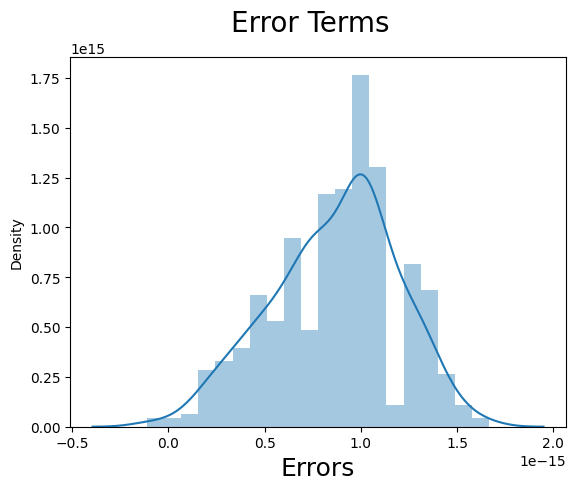

In [165]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Step 8: Making Predictions Using the Final Model
### Applying the scaling on the test sets

In [166]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.459904    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed      casual  registered         cnt  ...         Jul  \
count  219.000000  219.000000  219.000000  219.000000  ...  219.000000   
mean     0.313350    0.266372    0.527146    0.520592  ...    0.105023   
std      0.159947    0.217246    0.217921    0.218435  ...    0.307285   
min     -0.042808    0.002133    0.059486    0.048205  ...    0.000000   
25%      0.198517    0.101951    0.359154    0.377531  ...    0.000000   
50%      0.299459    0.223712    0.526567    0.524275  ...    0.000000   
75%      0.403048    0.362085    0.664742    0.672745  ...    0.000000   
max      0.807474    1.038708    0.985273    0.963300  ...    1.000000   

              Jun         Mar         May         Nov         Oct         Sep  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.095890    0.054795    0.086758    0.073059    0.082192    0.086758   
std      0.295115    0.228100    0.282125    0.260830    0.275286    0.282125   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           spring      summer      winter  
count  219.000000  219.000000  219.000000  
mean     0.255708    0.264840    0.232877  
std      0.437258    0.442259    0.423633  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      1.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 32 columns]

### Dividing into X_test and y_test

In [167]:
y_test = df_test.pop('cnt')
X_test = df_test

In [168]:
# Adding constant variable to test dataframe
X_test_m13 = sm.add_constant(X_test)

In [169]:
# Creating X_test_m13 dataframe by dropping variables from X_test_m13
X_test_m13 = X_test_m13.drop(['winter','May','Mar','Oct','Jun','Nov','Jul','Sep','Monday','Tuesday','Thursday','Aug','light','Jan','Dec'], axis=1)


In [170]:
# Making predictions using the thirteenth model
y_pred_m13 = lr_13.predict(X_test_m13)

# Step 9: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

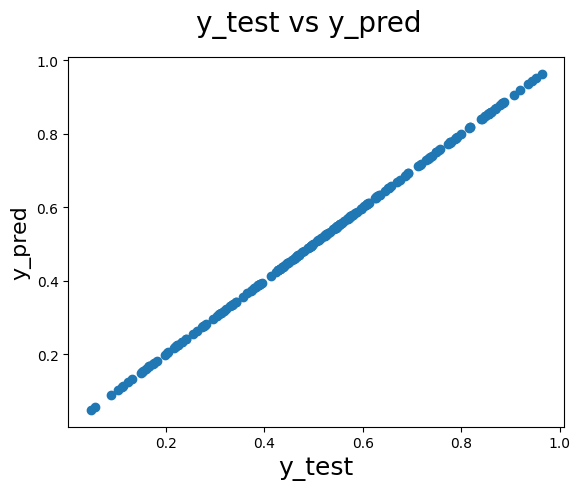

In [171]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m13)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [172]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred_m13)

1.0